In [ ]:
# Graph Cut Segmentation, KMeans Clustering, Feature Averaging, Synthetic Image generation
# Code written by A Siddharth Reddy

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from sklearn.neighbors import kneighbors_graph
import cv2

In [ ]:
# Loads the CSV file
file_path = '/content/tenth_vectors.csv'
features_df = pd.read_csv(file_path)

In [ ]:
# Extracts the feature vectors from the DataFrame
features = ["Area", "Aspect Ratio", "Extent", "Solidity", "Contrast", "Local Homogeneity", "Global Homogeneity", "Perimeter", "Minor Axis", "Major Axis", "Equivalent Diameter", "Circularity", "Convexity"]
X = features_df[features].values

In [ ]:
# Standardizes the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Reduces the dimensionality of the feature vectors to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [ ]:
# Adds the PCA components to the DataFrame
features_df['PCA1'] = X_pca[:, 0]
features_df['PCA2'] = X_pca[:, 1]

In [ ]:
def graph_cut_segmentation(X_pca, max_segments=100):
    # Number of neighbors for the graph
    k = 10
    connectivity = kneighbors_graph(X_pca, n_neighbors=k, include_self=False)
    G = nx.from_scipy_sparse_array(connectivity)
    labels = nx.algorithms.community.label_propagation_communities(G)
    labels_list = [list(community) for community in labels]
    labels_array = np.zeros(X_pca.shape[0], dtype=int)

    # Creates a dictionary to map node indices to segment labels
    segment_mapping = {}
    for i, community in enumerate(labels_list):
        for node in community:
            if len(segment_mapping) >= max_segments:
                break
            segment_mapping[node] = i

    # Assigns labels based on the mapping
    for node, label in segment_mapping.items():
        labels_array[node] = label

    return labels_array




In [ ]:
# Performs graph cut segmentation with segment count threshold
labels_array = graph_cut_segmentation(X_pca, max_segments=2000)
features_df['Segment'] = labels_array

In [ ]:
# Counts the number of unique segments
num_segments = len(np.unique(labels_array))
print(f"Number of segments: {num_segments}")

Number of segments: 105


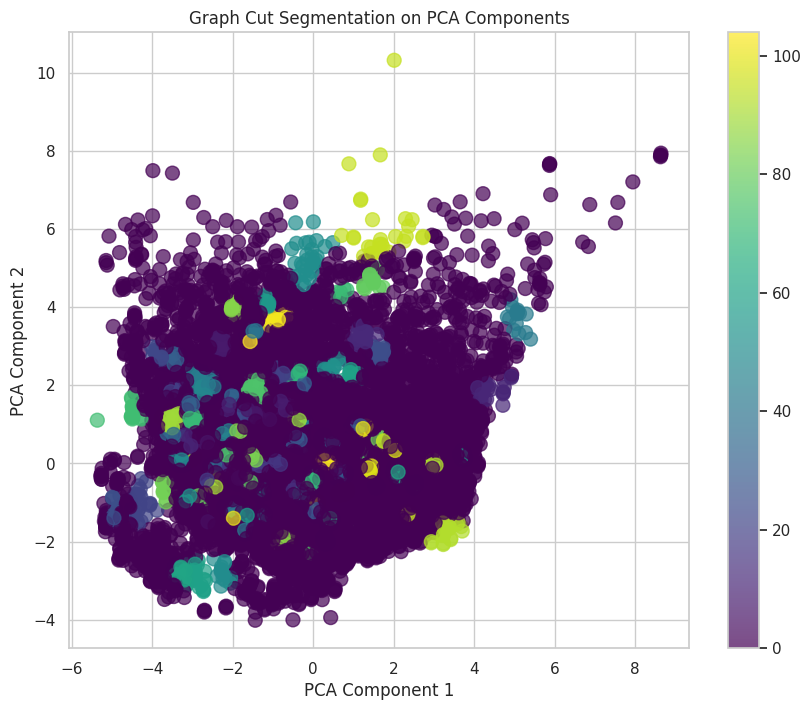

In [ ]:
# Plots the segmented PCA components
plt.figure(figsize=(10, 8))
scatter_plot = plt.scatter(features_df['PCA1'], features_df['PCA2'], c=features_df['Segment'], cmap='viridis', s=100, alpha=0.7)
plt.colorbar(scatter_plot)
plt.title('Graph Cut Segmentation on PCA Components')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [ ]:
# Saves the DataFrame with the segment labels to a new CSV file
features_df.to_csv('cell_features_with_segments.csv', index=False)

In [ ]:
# Performs K-means clustering
# Number of clusters
k = 8
kmeans = KMeans(n_clusters=k, random_state=0)
cluster_labels = kmeans.fit_predict(X_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


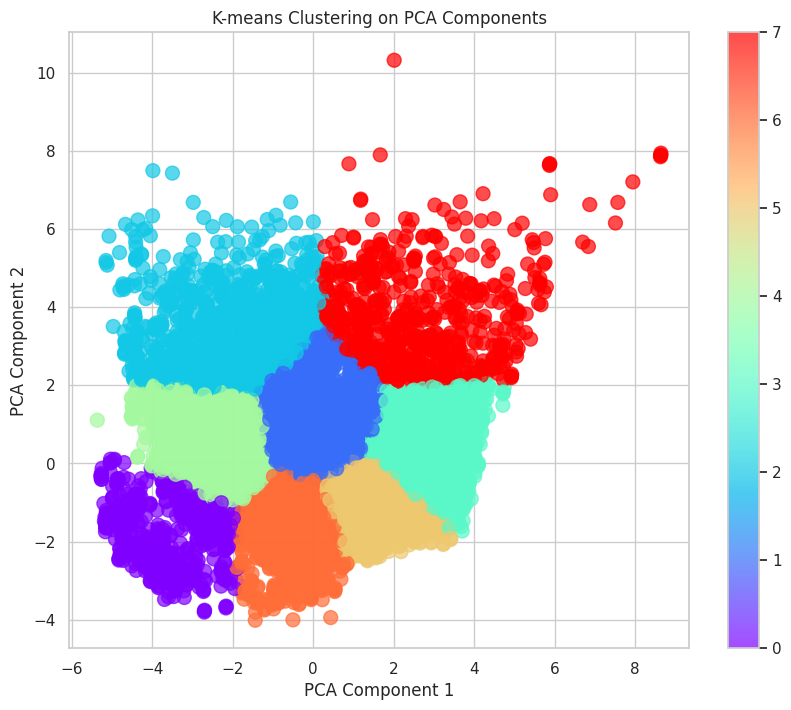

In [ ]:
# Adds cluster labels to features_df
features_df['Cluster'] = cluster_labels

# Plots the segmented PCA components with cluster colors
plt.figure(figsize=(10, 8))
scatter_plot = plt.scatter(features_df['PCA1'], features_df['PCA2'], c=features_df['Cluster'], cmap='rainbow', s=100, alpha=0.7)
plt.colorbar(scatter_plot)
plt.title('K-means Clustering on PCA Components')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [ ]:
# Saves the DataFrame with cluster labels to a new CSV file
features_df.to_csv('cell_features_with_clusters.csv', index=False)

In [ ]:
# Performs K-means clustering on the original feature data
n_clusters = 6  # Adjust the number of clusters as needed
kmeans_original = KMeans(n_clusters=n_clusters, random_state=0)
kmeans_original.fit(X_scaled)
features_df['Class'] = kmeans_original.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


{'Class_1': [1, 1, 1, 1, 2, 6, 8, 17, 18, 19, 26, 30, 31, 34, 38, 46, 63, 84, 85, 90, 95, 105, 107, 110, 119, 120, 129, 166, 174, 178, 180, 201, 227, 231, 232, 252, 257, 260, 272, 276, 277, 300, 309, 315, 317, 337, 360, 363, 364, 374, 379, 382, 407, 436, 445, 446, 459, 487, 500, 504, 506, 510, 522, 523, 535, 550, 553, 560, 597, 598, 611, 613, 647, 649, 668, 671, 680, 687, 692, 696, 715, 725, 741, 750, 753, 760, 765, 776, 781, 792, 796, 807, 809, 823, 827, 839, 851, 858, 862, 888, 892, 897, 909, 918, 927, 928, 932, 945, 971, 976, 981, 1027, 1032, 1035, 1040, 1064, 1066, 1068, 1081, 1083, 1114, 1115, 1126, 1139, 1174, 1186, 1198, 1199, 1204, 1205, 1215, 1217, 1224, 1239, 1256, 1304, 1312, 1316, 1330, 1355, 1356, 1359, 1405, 1407, 1417, 1422, 1444, 1461, 1465, 1471, 1489, 1500, 1502, 1503, 1505, 1509, 1514, 1524, 1525, 1532, 1553, 1566, 1592, 1601, 1603, 1621, 1630, 1636, 1640, 1646, 1677, 1683, 1687, 1697, 1706, 1710, 1722, 1724, 1731, 1732, 1735, 1740, 1741, 1744, 1761, 1767, 1791, 1815

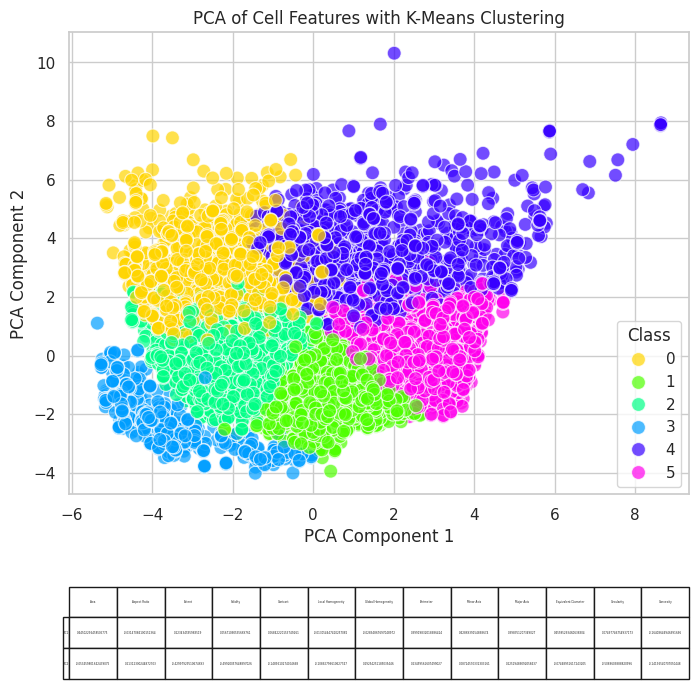

In [ ]:
# Creates a dictionary to store the labels for each class
class_dict = {}
for i in range(n_clusters):
    class_dict[f'Class_{i+1}'] = features_df[features_df['Class'] == i]['Label'].tolist()
print(class_dict)

# Prints the labels that belong to each class
for class_name, labels in class_dict.items():
    print(f"{class_name}: {labels}")

# Saves the DataFrame with the class labels to a new CSV file
features_df.to_csv("cell_features_with_classes.csv", index=False)

# Sets the style for the plot
sns.set(style="whitegrid")

# Creates a scatter plot of the PCA components, colored by the assigned class
plt.figure(figsize=(8, 6))
scatter_plot = sns.scatterplot(
    x='PCA1', y='PCA2', hue='Class', palette=sns.color_palette("hsv", n_clusters),
    data=features_df, legend='full', s=100, alpha=0.7
)

# Sets plot title and labels
plt.title('PCA of Cell Features with K-Means Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

# Adds a table to the plot showing PCA component contributions
table_data = pd.DataFrame(pca.components_, columns=features)
plt.table(cellText=table_data.values, colLabels=table_data.columns, rowLabels=[f'PC{i+1}' for i in range(pca.n_components_)], cellLoc='center', loc='bottom', bbox=[0.0, -0.4, 1.0, 0.2])
# Shows the legend
plt.legend(title='Class')
plt.show()

In [ ]:
# Calculates and prints the average of each feature for each segment
segment_means = features_df.groupby('Segment')[features].mean()
print("Average of each feature for each segment:")
print(segment_means)

Average of each feature for each segment:
              Area  Aspect Ratio    Extent  Solidity      Contrast  \
Segment                                                              
0        57.934555      1.175448  0.469817  0.815911  1.318181e+06   
1        61.583333      1.286911  0.515311  0.858891  7.984365e+05   
2        19.176471      1.097736  0.435404  0.836264  5.905746e+05   
3        28.115385      1.140478  0.338268  0.685070  6.920325e+05   
4         8.950000      0.760000  0.438750  0.918725  1.401163e+06   
...            ...           ...       ...       ...           ...   
100      70.944444      0.999062  0.413831  0.746551  7.056879e+05   
101      17.038462      0.953785  0.483955  0.933390  8.508586e+05   
102      21.000000      1.175546  0.162809  0.326347  8.559231e+05   
103      54.078947      1.285291  0.483518  0.834622  1.335070e+06   
104      17.250000      1.675000  0.201637  0.422561  5.625119e+05   

         Local Homogeneity  Global Homogeneity 

In [ ]:
# Calculates and prints the average of each feature for each cluster on PCA components
cluster_pca_means = features_df.groupby('Cluster')[features].mean()
print("Average of each feature for each cluster on PCA components:")
print(cluster_pca_means)

Average of each feature for each cluster on PCA components:
               Area  Aspect Ratio    Extent  Solidity      Contrast  \
Cluster                                                               
0          7.109234      1.057899  0.382906  0.956382  1.155054e+06   
1         48.709444      1.251107  0.400258  0.723498  7.728062e+05   
2         13.536364      1.635152  0.173268  0.420269  4.748119e+05   
3        113.904506      1.214493  0.510063  0.836505  1.447385e+06   
4         13.664915      1.182196  0.347320  0.770335  7.452478e+05   
5         81.397376      1.058609  0.598662  0.920511  1.479729e+06   
6         42.749245      1.019367  0.583077  0.934763  2.072950e+06   
7         82.231951      1.391082  0.263747  0.478844  9.718115e+05   

         Local Homogeneity  Global Homogeneity  Perimeter  Minor Axis  \
Cluster                                                                 
0                 0.326698            0.054745  10.645723    3.478604   
1         

In [ ]:
# Calculates and prints the average of each feature for each cluster from the original feature data
cluster_means = features_df.groupby('Class')[features].mean()
print("Average of each feature for each cluster from the original feature data:")
print(cluster_means)

Average of each feature for each cluster from the original feature data:
             Area  Aspect Ratio    Extent  Solidity      Contrast  \
Class                                                               
0       13.418929      1.760689  0.221230  0.531902  5.428601e+05   
1       61.682777      1.039783  0.594354  0.926770  1.940880e+06   
2       18.930546      1.053973  0.393600  0.804132  7.717276e+05   
3       12.269363      1.125083  0.406399  1.000000  1.230738e+06   
4       62.807947      1.202745  0.245709  0.456576  8.821523e+05   
5      103.602613      1.224995  0.526777  0.852563  1.322769e+06   

       Local Homogeneity  Global Homogeneity  Perimeter  Minor Axis  \
Class                                                                 
0               0.313246            0.183625  24.811387    5.639032   
1               0.339757            0.078449  31.832152    9.313583   
2               0.312453            0.085579  20.356809    5.802831   
3               0.3

In [ ]:
# Function to create a synthetic image based on the average features
def create_synthetic_image(features, image_size=(20, 20)):
    img = np.zeros(image_size, dtype=np.uint8)
    mask = np.zeros(image_size, dtype=np.uint8)
    center = (image_size[1] // 2, image_size[0] // 2)
    axis_length = (int(features['Major Axis'] / 2), int(features['Minor Axis'] / 2))
    angle = 0
    start_angle = 0
    end_angle = 360

    # Draws the ellipse to represent the cell shape
    cv2.ellipse(mask, center, axis_length, angle, start_angle, end_angle, 255, -1)
    img[mask == 255] = 128  # Set the cell area to a mid-gray value

    # Adds noise or texture to represent homogeneity within the cell area
    if features['Local Homogeneity'] > 0:
        noise = np.random.normal(loc=128, scale=features['Local Homogeneity']*80, size=image_size).astype(np.uint8)
        img = cv2.addWeighted(img, 0.5, noise, 0.5, 0)
        # Ensures the background remains black
        img[mask == 0] = 0

    return img

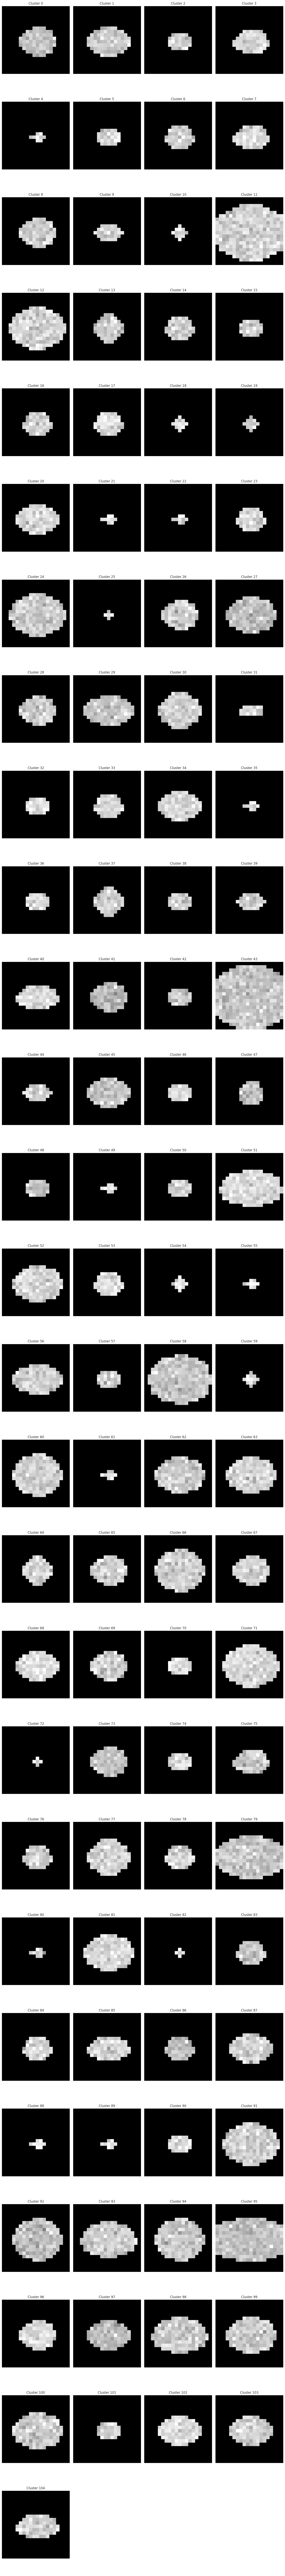

In [ ]:
# Generates and displays synthetic images for each cluster
num_clusters = len(segment_means)
cols = 4
# Calculates number of rows needed
rows = (num_clusters + cols - 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 5))

for i, (cluster_id, avg_features) in enumerate(segment_means.iterrows()):
    synthetic_img = create_synthetic_image(avg_features)

    # Saves the synthetic image
    file_name = f'synthetic_image_segment_pca_{cluster_id}.png'
    cv2.imwrite(file_name, synthetic_img)

    # Displays the synthetic image
    row, col = divmod(i, cols)
    ax = axes[row, col]
    ax.imshow(synthetic_img, cmap='gray')
    ax.set_title(f'Cluster {cluster_id}')
    ax.axis('off')

# Turns off unused subplots
for j in range(i + 1, rows * cols):
    row, col = divmod(j, cols)
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

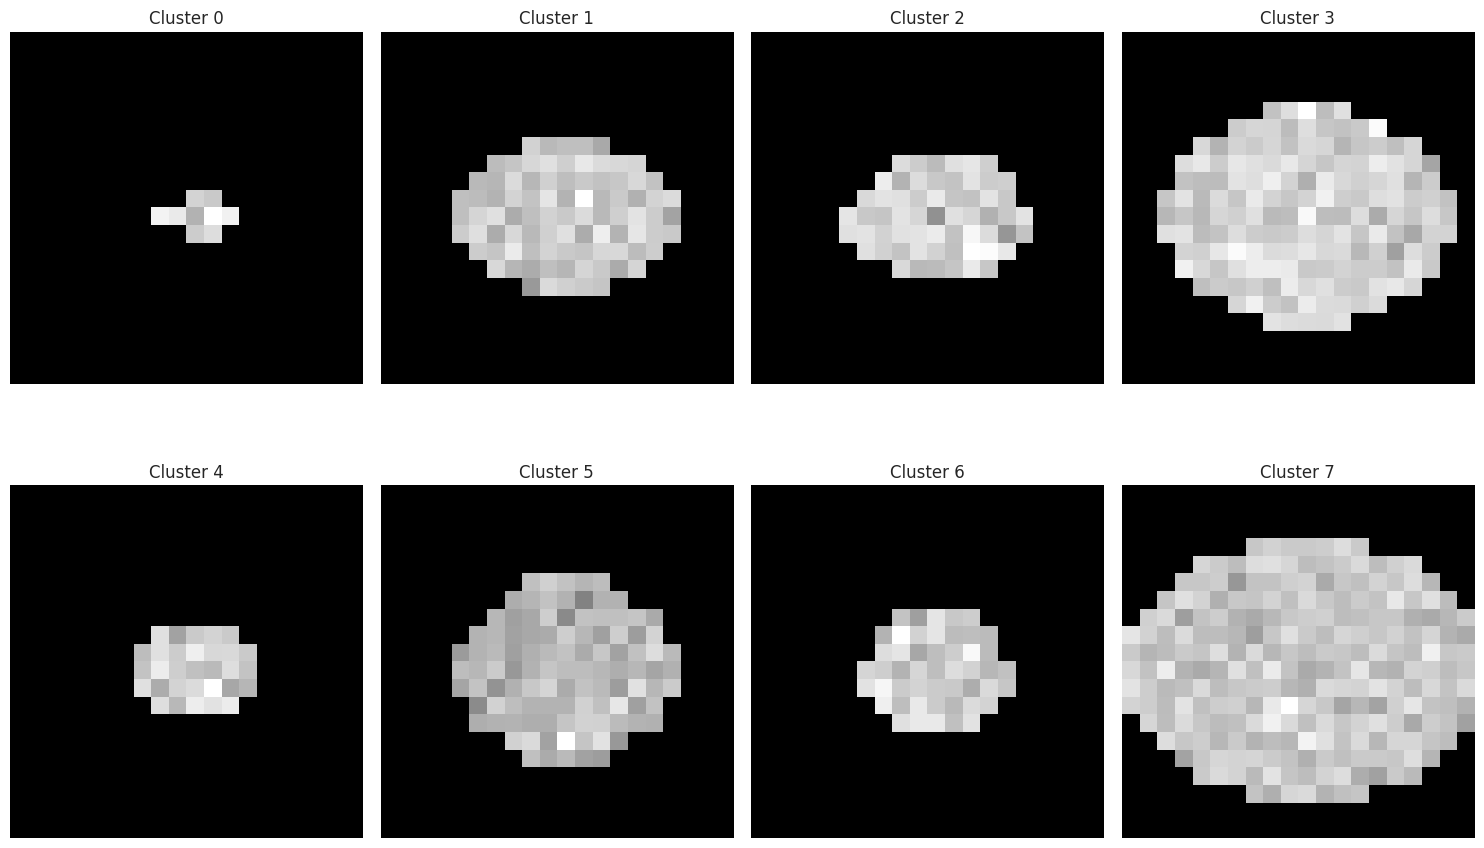

In [ ]:
# Generates and displays synthetic images for each cluster
num_clusters = len(cluster_pca_means)
cols = 4
# Calculates number of rows needed
rows = (num_clusters + cols - 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 5))

for i, (cluster_id, avg_features) in enumerate(cluster_pca_means.iterrows()):
    synthetic_img = create_synthetic_image(avg_features)

    # Saves the synthetic image
    file_name = f'synthetic_image_cluster_pca_{cluster_id}.png'
    cv2.imwrite(file_name, synthetic_img)

    # Displays the synthetic image
    row, col = divmod(i, cols)
    ax = axes[row, col]
    ax.imshow(synthetic_img, cmap='gray')
    ax.set_title(f'Cluster {cluster_id}')
    ax.axis('off')

# Turns off unused subplots
for j in range(i + 1, rows * cols):
    row, col = divmod(j, cols)
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
import os

In [ ]:
# Creates a folder named "synthetic_imgs" in my drive
output_folder = '/content/drive/My Drive/synthetic_imgs'
os.makedirs(output_folder, exist_ok=True)


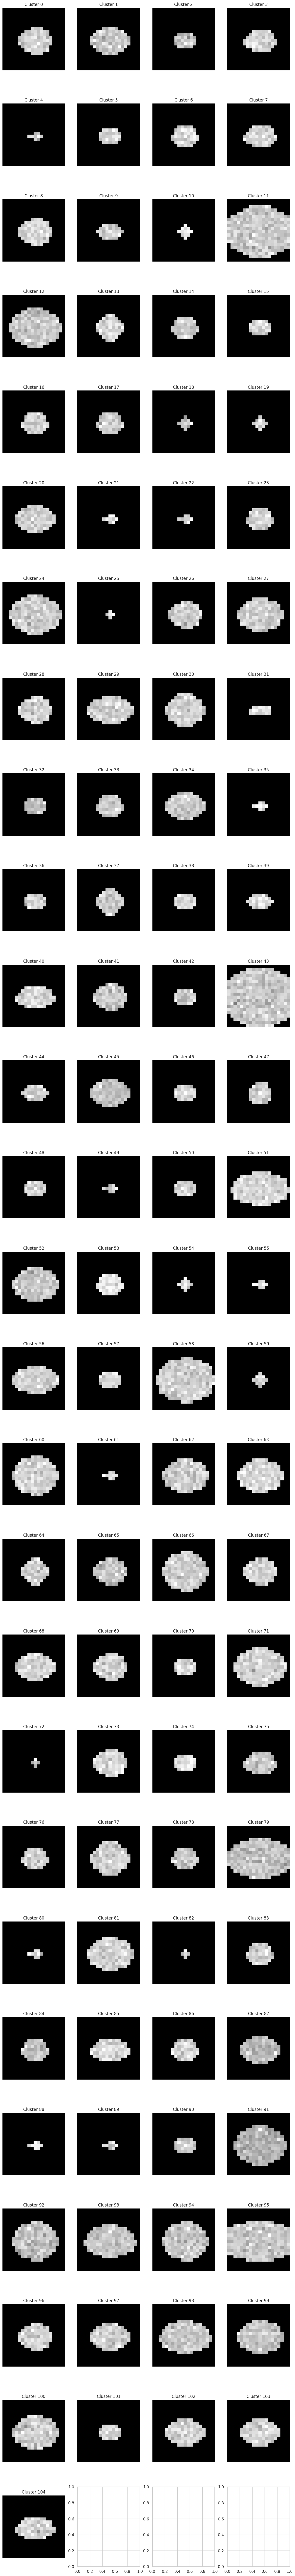

In [ ]:
# Generates and displays synthetic images for each cluster
num_clusters = len(segment_means)
cols = 4
# Calculate number of rows needed
rows = (num_clusters + cols - 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 5))

for i, (cluster_id, avg_features) in enumerate(segment_means.iterrows()):
    synthetic_img = create_synthetic_image(avg_features)

    # Saves the synthetic image in the "synthetic_imgs" folder
    file_name = os.path.join(output_folder, f'synthetic_image_segment_pca_{cluster_id}.png')
    cv2.imwrite(file_name, synthetic_img)

    # Displays the synthetic image
    row, col = divmod(i, cols)
    ax = axes[row, col]
    ax.imshow(synthetic_img, cmap='gray')
    ax.set_title(f'Cluster {cluster_id}')
    ax.axis('off')

# Turns off unused subplots
for j in range(i + 1, rows * cols):
  row, col = divmod(j, cols)
  axes[row, col].axis('off')
plt.tight_layout()
plt.show()